# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from datetime import date
today = str(date.today().strftime('%m/%d/%y'))
print(today)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
unit = "Imperial"

#print(api_key)

# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"

03/25/19


## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_weather_data = pd.DataFrame()
city_weather_data["City"] = ""
city_weather_data["Country"] = ""
city_weather_data["Cloudiness"] = ""
city_weather_data["Date"] = ""
city_weather_data["Humidity"] = ""
city_weather_data["Lat"] = ""
city_weather_data["Lng"] = ""
city_weather_data["Max_Temp"] = ""
city_weather_data["Wind_Speed"] = ""


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



473

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
weather_json = ""
for x in range(len(cities)):
    v_city = cities[x]
    # Build query URL
    query_url = base_url + "appid=" + api_key + "&q=" + v_city + "&units=" + unit
    print(query_url)
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #temp = weather_json["main"]["temp"]
    #print(f'City: {v_city} Temp: {weather_json["main"]["temp"]}')
    try:
        city_weather_data.loc[x, "City"] = v_city
        city_weather_data.loc[x,"Country"] = weather_json["sys"]["country"]
        city_weather_data.loc[x,"Date"] = weather_json["dt"]
        city_weather_data.loc[x,"Humidity"] = weather_json["main"]["humidity"]
        city_weather_data.loc[x,"Wind_Speed"] = weather_json["wind"]["speed"]
        city_weather_data.loc[x,"Lat"] = weather_json["coord"]["lat"]
        city_weather_data.loc[x,"Lng"] = weather_json["coord"]["lon"]
        city_weather_data.loc[x,"Max_Temp"] = weather_json["main"]["temp"]
        city_weather_data.loc[x,"Cloudiness"] = weather_json["clouds"]["all"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")


http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=rikitea&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=atar&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=nikolskoye&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=samarai&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=mataura&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=fountain hills&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=georgetown&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=daman&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=hilo&units=Imper

http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=fengrun&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=sabalgarh&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=shingu&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=xai-xai&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=mirnyy&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=westport&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=olafsvik&units=Imperial
Missing field/result... skipping.
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=bambous virieux&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac42

http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=faya&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=new norfolk&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=omboue&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=kahului&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=dovbysh&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=kalmunai&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=kavaratti&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=derzhavinsk&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=mantua&units=Impe

http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=babanusah&units=Imperial
Missing field/result... skipping.
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=carutapera&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=moron&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=yellowknife&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=leningradskiy&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=comodoro rivadavia&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=nouadhibou&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=lieksa&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid

http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=polson&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=alofi&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=haapu&units=Imperial
Missing field/result... skipping.
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=asau&units=Imperial
Missing field/result... skipping.
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=movila&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=sao joao da barra&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=vanimo&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=awbari&units=Imperial
http://api.openweathermap.org/data/2.5/weathe

http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=bethel&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=kuusamo&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=sibolga&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=petropavlovsk-kamchatskiy&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=teguise&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=laguna&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=alta gracia&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=bandiagara&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=v

http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=talara&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=bolungarvik&units=Imperial
Missing field/result... skipping.
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=cabo san lucas&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=rudbar&units=Imperial
Missing field/result... skipping.
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=roanoke rapids&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=roma&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=sao filipe&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=76b30e6b5b9ac4278a5b5fd12f72b8b6&q=northam&units=Imperial
http://api.openweathermap.or

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
city_weather_data = city_weather_data.dropna()
#city_weather_data.head(50)
city_weather_data.to_csv("../Output/city_weather_data.csv")

In [45]:
city_weather_data.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,rikitea,PF,64,1553565945,100,-23.12,-134.97,75.99,9.53
1,atar,MR,0,1553565780,59,20.52,-13.05,55.38,5.61
2,nikolskoye,RU,75,1553565635,92,59.7,30.79,29.62,11.18
3,samarai,PG,44,1553565945,98,-10.62,150.67,83.46,15.46
4,mataura,NZ,88,1553565609,93,-46.19,168.86,60.01,7


In [46]:
city_weather_data.Lat = city_weather_data.Lat.astype(float)
city_weather_data.Lng = city_weather_data.Lng.astype(float)
city_weather_data.Max_Temp = city_weather_data.Max_Temp.astype(float)
city_weather_data.Wind_Speed = city_weather_data.Wind_Speed.astype(float)
city_weather_data.Humidity = city_weather_data.Humidity.astype(float)
city_weather_data.Cloudiness = city_weather_data.Cloudiness.astype(float)
city_weather_data.dtypes


City           object
Country        object
Cloudiness    float64
Date           object
Humidity      float64
Lat           float64
Lng           float64
Max_Temp      float64
Wind_Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

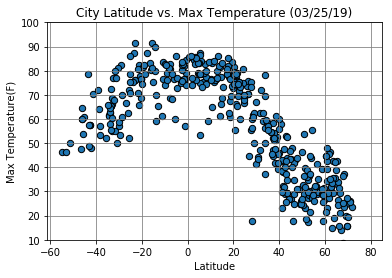

In [53]:
ax=city_weather_data.plot.scatter(x='Lat',
                                    y='Max_Temp',
                                    marker="o",
                                    s=40,
                                    facecolors='blue',
                                    edgecolors="black"
                                    )

plt.ylim(10,100)
# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
ax.yaxis.grid(color='gray') #, linestyle='dashed')
ax.xaxis.grid(color='gray')
#save figure
plt.savefig("../Images/weatherpy_maxtem_lat_plot.png")


#### Latitude vs. Humidity Plot

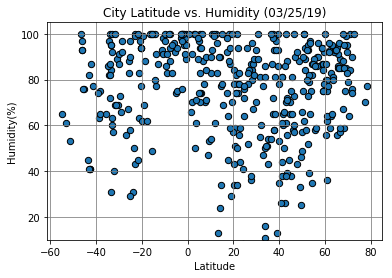

In [57]:
ax=city_weather_data.plot.scatter(x='Lat',
                                    y='Humidity',
                                    marker="o",
                                    s=40,
                                    facecolors='blue',
                                    edgecolors="black"
                                    )

plt.ylim(10,105)
# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
ax.yaxis.grid(color='gray') #, linestyle='dashed')
ax.xaxis.grid(color='gray')
#save figure
plt.savefig("../Images/weatherpy_humidity_lat_plot.png")



#### Latitude vs. Cloudiness Plot

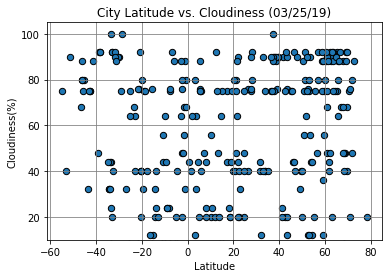

In [58]:
ax=city_weather_data.plot.scatter(x='Lat',
                                    y='Cloudiness',
                                    marker="o",
                                    s=40,
                                    facecolors='blue',
                                    edgecolors="black"
                                    )

plt.ylim(10,105)
# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
ax.yaxis.grid(color='gray') #, linestyle='dashed')
ax.xaxis.grid(color='gray')
#save figure
plt.savefig("../Images/weatherpy_cloudiness_lat_plot.png")

#### Latitude vs. Wind Speed Plot

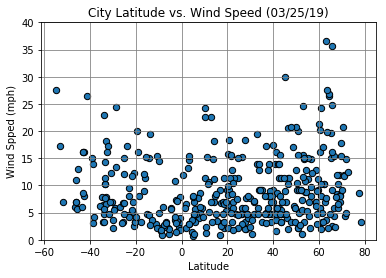

In [60]:
ax=city_weather_data.plot.scatter(x='Lat',
                                    y='Wind_Speed',
                                    marker="o",
                                    s=40,
                                    facecolors='blue',
                                    edgecolors="black"
                                    )

plt.ylim(0,40)
# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Spped (mph)")
ax.yaxis.grid(color='gray') #, linestyle='dashed')
ax.xaxis.grid(color='gray')
#save figure
plt.savefig("../Images/weatherpy_windspeed_lat_plot.png")

                                            # THE END